In [1]:
from __future__ import division, unicode_literals, print_function
import os

In [2]:
import sys
sys.getdefaultencoding()

'ascii'

In [3]:
reload(sys)
sys.setdefaultencoding('utf-8')

In [4]:
from numpy import *
import statsmodels.api as sm
import scipy as sp
import pandas as pd
from pandas import DataFrame, Series

In [5]:
import matplotlib.pyplot as plt
import prettyplotlib as ppl
import seaborn as sns

In [6]:
sns.set(style="white", color_codes=True)
sns.set(style="ticks", palette="Set2")
sns.despine()

In [7]:
%matplotlib inline

In [8]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)

In [9]:
dir_imgs = u'/Users/mmngreco/Documents/repos/okun_with_mpa/imgs'
dir_data_work = u'/Users/mmngreco/Documents/repos/okun_with_mpa/data_work'

# TEORÍA

- [Ley de Okun](https://es.wikipedia.org/wiki/Ley_de_Okun)
- [Okun's Law](https://en.wikipedia.org/wiki/Okun%27s_law)
- [How useful is Okun's Law](https://www.kansascityfed.org/publicat/econrev/pdf/4q07knotek.pdf)
- [Interpreting Deviations from Okun’s Law](http://www.frbsf.org/economic-research/publications/economic-letter/2014/april/okun-law-deviation-unemployment-recession/)
- [Do Forecasters Believe in Okun’s Law? An Assessment of Unemployment and Output Forecasts](https://www.imf.org/external/pubs/ft/wp/2014/wp1424.pdf)


# Ley de Okun

La llamada ley de Okun es una observación empírica que señala la correlación existente entre los cambios en la tasa de desempleo y el crecimiento de una economía. Fue propuesta en 1962 por el economista norteamericano Arthur Okun en el artículo "Potential GNP: Its Measurement and Significance".1

Okun señaló que para mantener los niveles de empleo, una economía necesitaba crecer cada año entre el 2,6% y el 3%. Cualquier crecimiento inferior significaba un incremento del desempleo debido a la mejora de la productividad. La ley de Okun señala además, que una vez mantenido el nivel de empleo gracias al crecimiento del 3%, para conseguir disminuir el desempleo es necesario crecer dos puntos porcentuales por cada punto de desempleo que se quiera reducir.2

Esta "ley", es solo una observación empírica, ya que no es posible demostrarla. Okun se basó en datos de los años 1950 en Estados Unidos, y además avisó que esta teoría sólo es efectiva cuando la tasa de desempleo está entre el 3 y 7,5 %. A pesar de eso, la regla se ha cumplido aproximadamente en la mayoría de casos, y por eso es considerada como una observación muy fiable en macroeconomía. El porcentaje exacto depende del período y país considerados, aunque lo normal es que esté alrededor del 2,5 % (entre 2 y 3). El hecho de que el coeficiente no sea predecible hace que algunos consideren a esta regla poco apropiada.

Formulación matemática de la observación de Okun[editar]
La ley de Okun puede ser expresada en la siguiente forma:3

## $$(\overline{Y}-Y)/\overline{Y} = c(u-\overline{u}), $$

donde:
- $\overline{Y}$ es la PIB de pleno empleo o producción potencial
- Y es el PIB actual
- $\overline{u}$ es la tasa natural de desempleo
- $u$ es la tasa actual de desempleo
- $c$ es el factor que relaciona los cambios en el desempleo con los cambios en la producción.

La ley de Okun tal como se ha mostrado antes es difícil de usar en la práctica porque $\overline{Y}$ y $\overline{u}$ pueden ser solo estimados, nunca medidos. Una forma más corriente de expresar la ley, expresada en forma de tasa de crecimiento de la ley de Okun, relaciona los cambios en la producción con los cambios en el desempleo:

## $$\Delta Y/Y = k - c \Delta u$$

donde:
- Y y c tal como se definieron anteriormente
- $\Delta Y$ es el cambio en la producción actual desde un año al siguiente
- $\Delta u$ es el cambio en el desempleo actual desde un año al siguiente
- k es el porcentaje anual de crecimiento de la producción de pleno empleo

# REGRESIÓN

- statsmodels: [Regression](http://statsmodels.sourceforge.net/devel/regression.html) [Get Started](http://statsmodels.sourceforge.net/devel/gettingstarted.html)
- Linear Regression: [link](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)

# DATOS

In [10]:
# importamos los datos:

os.chdir(dir_data_work)
# encod = 'utf-8'
encod = 'utf-8-sig'

dempleo = pd.read_excel('d_empleo.xls', encoding=encod, index_col=0)
dtparo = pd.read_excel('d_tasa_u.xls', encoding=encod, index_col=0)
dpib = pd.read_excel('d_y.xls', encoding=encod, index_col=0)

In [11]:
ccaa = dempleo.columns # variable con los nombres de las ccaa

## Número de variables: 

In [12]:
len(ccaa)

18

In [13]:
dtparo.head()

,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
tiempo,,,,,,,,,,,,,,,,,,
1977,0.9500,1.9250,0.3950,0.7700,-0.0050,0.1950,0.4450,1.5200,0.5300,0.5150,0.8450,3.6600,0.3100,1.1700,-0.0650,-0.500,0.7200,0.3350
1978,1.7575,1.4450,2.1000,1.3400,0.2225,1.2675,0.9575,1.0400,1.5025,2.2925,1.1000,1.7825,0.6850,3.0475,0.9475,2.160,3.1450,1.1100
1979,1.6925,1.3275,1.6925,2.2325,0.4725,0.7400,1.0200,1.4500,1.6425,1.8675,1.8825,3.2200,0.8625,2.0875,1.9200,2.985,2.2650,1.5275
1980,2.7800,3.5650,2.1400,1.0675,3.1800,1.6975,1.9725,1.7250,2.9925,4.2400,3.0675,1.5025,1.6100,2.1575,1.8650,3.450,3.0200,1.0575
1981,2.6150,2.3850,3.1725,3.3450,1.9625,3.9050,2.8425,1.9225,3.2925,3.1625,3.6225,1.5200,1.1075,1.8175,2.7275,1.160,3.3375,2.2550


In [14]:
dempleo.tail(2)

,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
tiempo,,,,,,,,,,,,,,,,,,
2014,1.194058,2.438428,0.792991,1.867991,1.412103,1.249152,1.443017,0.387749,-0.017742,2.065190,1.671649,4.160871,-0.83142,-0.070260,2.963758,1.68552,-0.937460,2.992088
2015,2.966834,4.738076,4.566611,-0.746358,6.859730,4.957496,1.518142,1.809023,0.420586,1.631152,4.090791,1.747885,1.16700,5.082604,-1.555106,0.60807,0.741939,1.061407


In [15]:
dpib.head(2)

,España,Andalucía,Aragón,"Asturias, Principado de","Balears, Illes",Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,"Madrid, Comunidad de","Murcia, Región de","Navarra, Comunidad Foral de",País Vasco,"Rioja, La"
tiempo,,,,,,,,,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,-0.176386,-1.456997,-2.346228,1.121621,3.640682,0.942174,1.35897,-5.480896,-3.760777,-1.091455,2.764928,-3.071443,1.22678,0.694282,1.074916,3.254464,1.394926,4.012676


# Comprobamos que están todas las filas (años)

En cada dataframe tenemos la variable tiempo, cuya diferencia tiene que ser 1, así comprobamos que no nos hayamos dejado ningúna fila por el camino.

In [16]:
DataFrame([dempleo.index, dpib.index, dtparo.index], index=['dempleo', 'dpib', 'dtparo'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
dempleo,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
dpib,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,NaN,NaN,NaN,NaN
dtparo,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,NaN,NaN


# Cambiamos el directorio de trabajo a imgs

In [17]:
os.chdir(dir_imgs) 

In [18]:
data = pd.concat([dtparo, dpib, dempleo], axis=1, keys=['du', 'dy', 'dl'], names=['variables', 'ccaa'])

In [19]:
data.head()

variables      du                                                           \
ccaa       España Andalucía  Aragón Asturias, Principado de Balears, Illes   
tiempo                                                                       
1977       0.9500    1.9250  0.3950                  0.7700        -0.0050   
1978       1.7575    1.4450  2.1000                  1.3400         0.2225   
1979       1.6925    1.3275  1.6925                  2.2325         0.4725   
1980       2.7800    3.5650  2.1400                  1.0675         3.1800   
1981       2.6150    2.3850  3.1725                  3.3450         1.9625   

variables                                                                   \
ccaa      Canarias Cantabria Castilla y León Castilla - La Mancha Cataluña   
tiempo                                                                       
1977        0.1950    0.4450          1.5200               0.5300   0.5150   
1978        1.2675    0.9575          1.0400               1.5025   2.2925   
1979        0.7400    1.0200          1.4500               1.6425   1.8675   
1980        1.6975    1.9725          1.7250               2.9925   4.2400   
1981        3.9050    2.8425          1.9225               3.2925   3.1625   

variables                                                                \
ccaa      Comunitat Valenciana Extremadura Galicia Madrid, Comunidad de   
tiempo                                                                    
1977                    0.8450      3.6600  0.3100               1.1700   
1978                    1.1000      1.7825  0.6850               3.0475   
1979                    1.8825      3.2200  0.8625               2.0875   
1980                    3.0675      1.5025  1.6100               2.1575   
1981                    3.6225      1.5200  1.1075               1.8175   

variables                                                                     \
ccaa      Murcia, Región de Navarra, Comunidad Foral de País Vasco Rioja, La   
tiempo                                                                         
1977                -0.0650                      -0.500     0.7200    0.3350   
1978                 0.9475                       2.160     3.1450    1.1100   
1979                 1.9200                       2.985     2.2650    1.5275   
1980                 1.8650                       3.450     3.0200    1.0575   
1981                 2.7275                       1.160     3.3375    2.2550   

variables        dy                                              \
ccaa         España Andalucía    Aragón Asturias, Principado de   
tiempo                                                            
1977            NaN       NaN       NaN                     NaN   
1978            NaN       NaN       NaN                     NaN   
1979            NaN       NaN       NaN                     NaN   
1980            NaN       NaN       NaN                     NaN   
1981      -0.176386 -1.456997 -2.346228                1.121621   

variables                                                     \
ccaa      Balears, Illes  Canarias Cantabria Castilla y León   
tiempo                                                         
1977                 NaN       NaN       NaN             NaN   
1978                 NaN       NaN       NaN             NaN   
1979                 NaN       NaN       NaN             NaN   
1980                 NaN       NaN       NaN             NaN   
1981            3.640682  0.942174   1.35897       -5.480896   

variables                                                                  \
ccaa      Castilla - La Mancha  Cataluña Comunitat Valenciana Extremadura   
tiempo                                                                      
1977                       NaN       NaN                  NaN         NaN   
1978                       NaN       NaN                  NaN         NaN   
1979                       NaN       NaN                  NaN         NaN

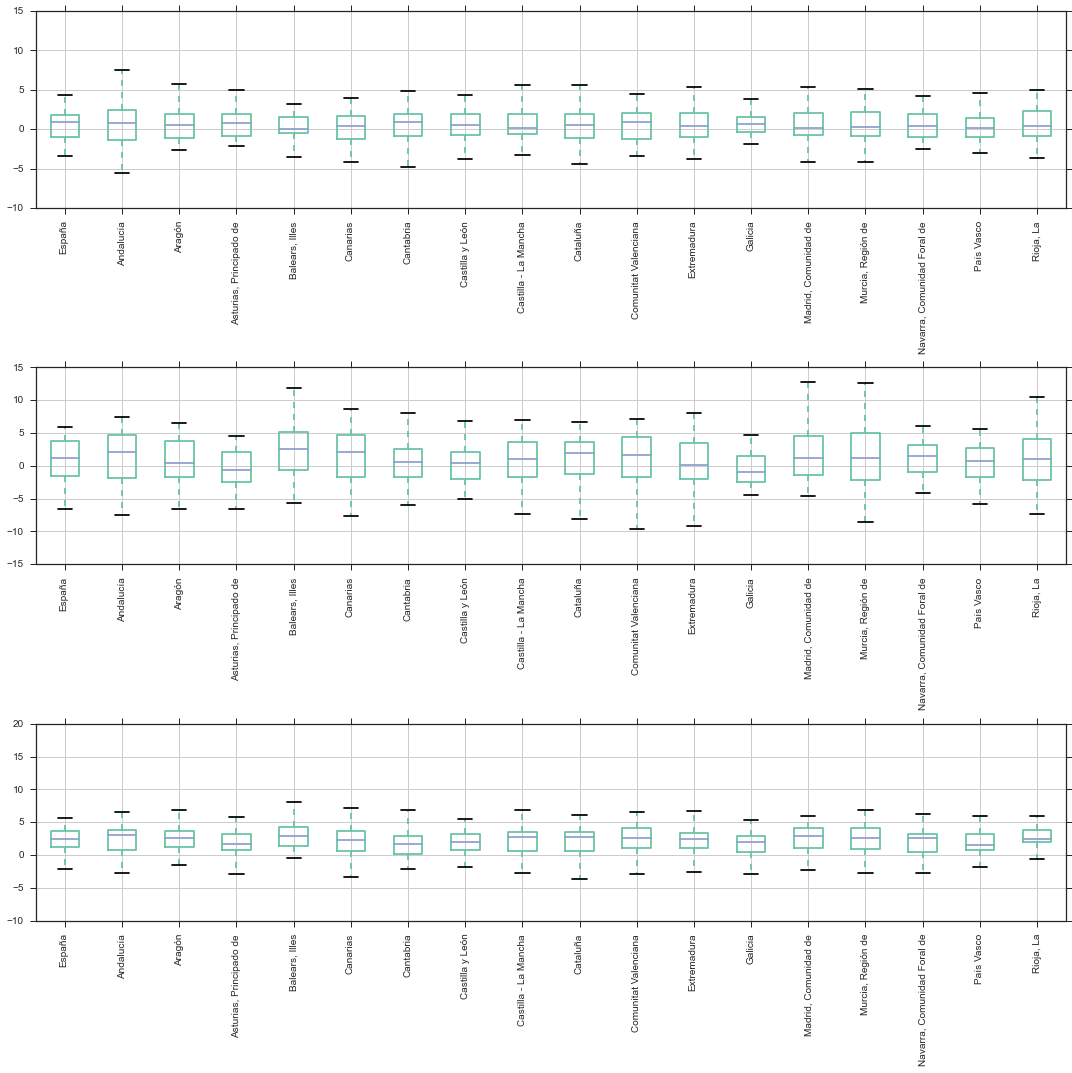

In [20]:
# con matplotlib
fig = plt.figure(figsize=(15,15))
data.du.boxplot(rot=90, ax=fig.add_subplot(311))
data.dl.boxplot(rot=90, ax=fig.add_subplot(312))
data.dy.boxplot(rot=90, ax=fig.add_subplot(313))

plt.tight_layout()

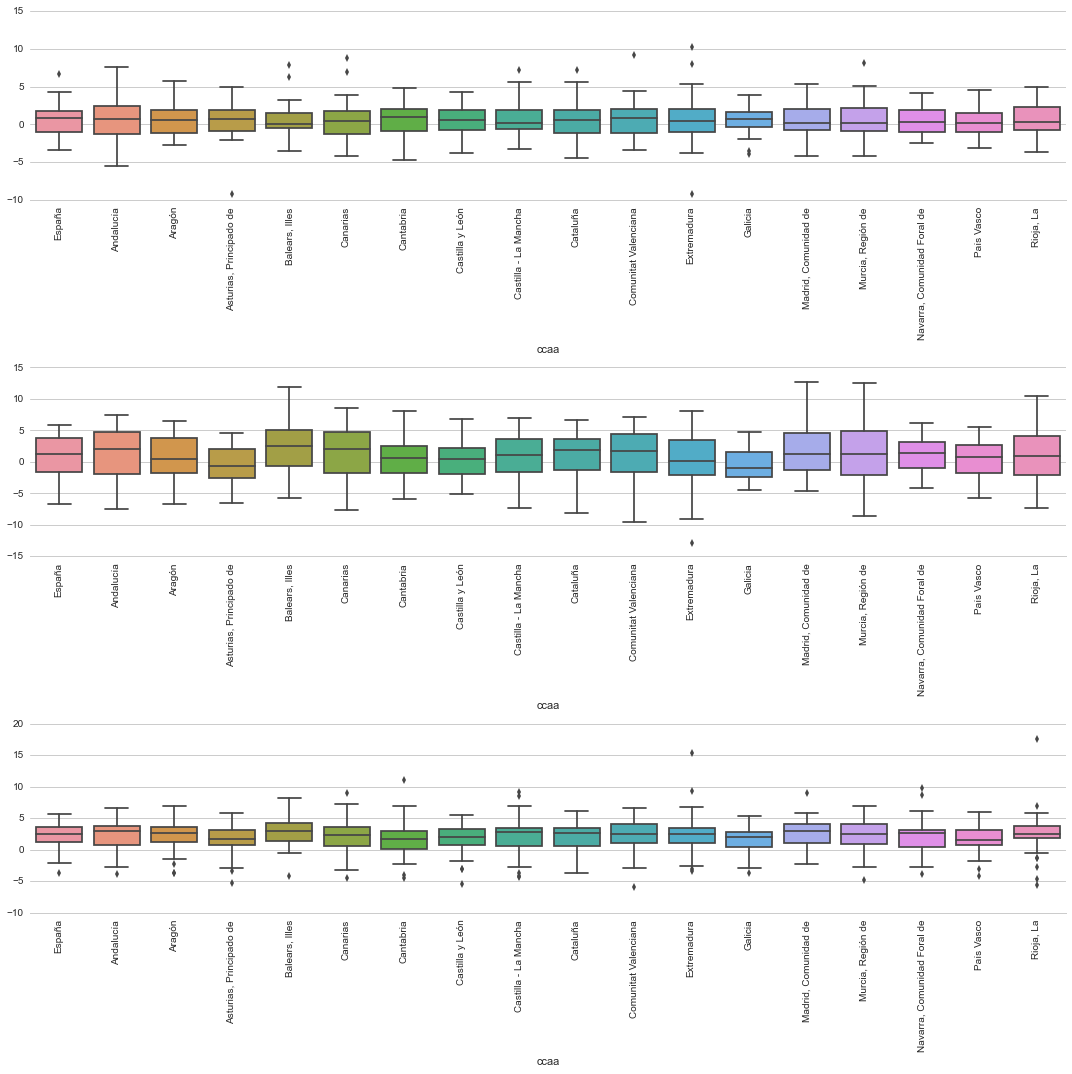

In [21]:
# con seaborn
fig = plt.figure(figsize=(15,15))
sns.set(style='whitegrid')

g1 = sns.boxplot(data=data.du, fliersize=5, width=.8, ax=fig.add_subplot(311))
g1.set_xticklabels(data.du.columns, rotation=90)

g2 = sns.boxplot(data=data.dl, fliersize=5, width=.8, ax=fig.add_subplot(312))
g2.set_xticklabels(data.dl.columns, rotation=90)

g3 = sns.boxplot(data=data.dy, fliersize=5, width=.8, ax=fig.add_subplot(313))
g3.set_xticklabels(data.dy.columns, rotation=90)

sns.despine(left=True)

plt.tight_layout()

# Comprobamos que x e y tengan las mismas filas.

In [22]:
dtparo.shape, dpib.shape, dempleo.shape

((37, 18), (35, 18), (39, 18))

# CORRELACIONES:

El coeficiente de correlación de Pearson se simboliza con la letra $\rho_{x,y}$, siendo la expresión que nos permite calcularlo:

## $$\rho_{X,Y}={\sigma_{XY} \over \sigma_X \sigma_Y} ={E[(X-\mu_X)(Y-\mu_Y)] \over \sigma_X\sigma_Y}$$

Donde:

- $\sigma_{XY}$ es la covarianza de (X,Y)
- $\sigma_{X}$ es la desviación típica de la variable X
- $\sigma_{Y}$ es la desviación típica de la variable Y

## TASA DE PARO Y PIB:

En teoría, esperamos que la correlación entre la tasa de paro y el PIB sea __negativa__, cuanto más aumente PIB el efecto esperado sobre la tasa de paro es que disminuya.

Veamos que sucede:

In [23]:
d = pd.concat([dtparo, dpib, dempleo], keys=['du', 'dy', 'dl'], axis=1)

In [24]:
dtparo.corrwith(dpib, axis=0).order(ascending=True)

España                        -0.853499
Cataluña                      -0.849724
Comunitat Valenciana          -0.824133
País Vasco                    -0.793044
Murcia, Región de             -0.751683
Madrid, Comunidad de          -0.749372
Canarias                      -0.738397
Andalucía                     -0.735206
Navarra, Comunidad Foral de   -0.697023
Aragón                        -0.677548
Castilla - La Mancha          -0.634051
Galicia                       -0.623343
Balears, Illes                -0.588539
Asturias, Principado de       -0.518155
Cantabria                     -0.474544
Castilla y León               -0.456801
Rioja, La                     -0.241777
Extremadura                   -0.015733
dtype: float64

En general, se cumple la teoría, pero vemos que los efectos no son muy intensos. Destaca sobre todo Extremadura, que tiene un coeficiente de correlación positivo.

## EMPLEO Y PIB

En este caso, el efecto esperado del empleo sobre el pib es que sea positivo. Cuanto más crece la economía más trabajo emplea.

In [25]:
dempleo.corrwith(dpib, axis=0,).order(ascending=True)

Extremadura                    0.149665
Rioja, La                      0.188919
Balears, Illes                 0.211072
Castilla y León                0.524665
Cantabria                      0.524795
Asturias, Principado de        0.553991
Aragón                         0.639276
Galicia                        0.672174
Canarias                       0.701539
Madrid, Comunidad de           0.703806
Navarra, Comunidad Foral de    0.715610
Castilla - La Mancha           0.737637
Murcia, Región de              0.763894
País Vasco                     0.794625
Andalucía                      0.836897
Cataluña                       0.854433
Comunitat Valenciana           0.865535
España                         0.893613
dtype: float64

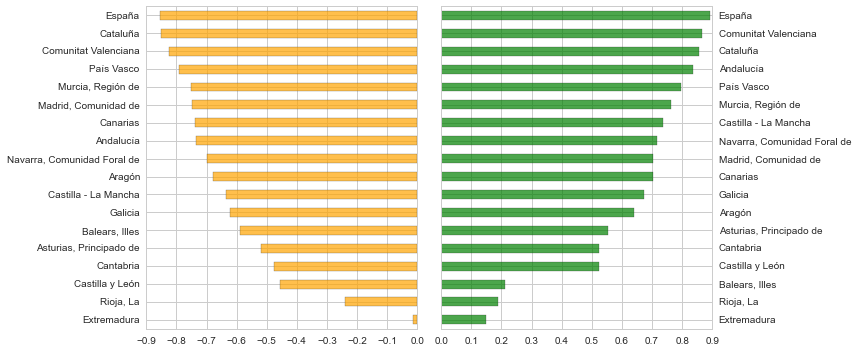

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(121)
d.du.corrwith(d.dy, axis=0).order(ascending=False).plot(kind='barh', color='orange', alpha=0.7)
plt.subplot(122)
d.dl.corrwith(d.dy, axis=0).order(ascending=True).plot(kind='barh', color='green', alpha=0.7)
plt.gca().yaxis.tick_right()

plt.tight_layout()

# GRÁFICOS REGRESIÓN:

Gráfico de dispersión con regresión e intervalo de confianza al 95%. Histograma de cada variable.

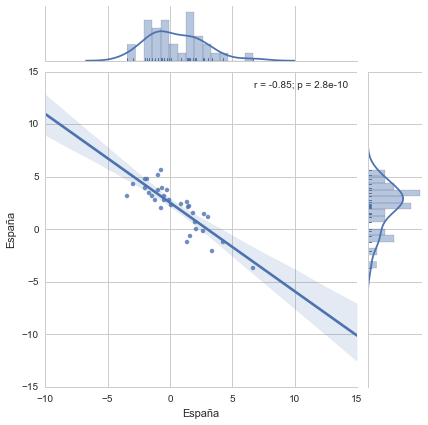

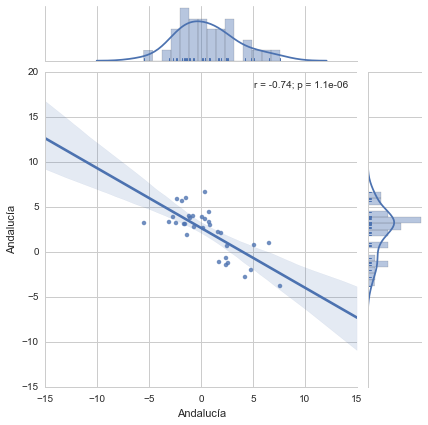

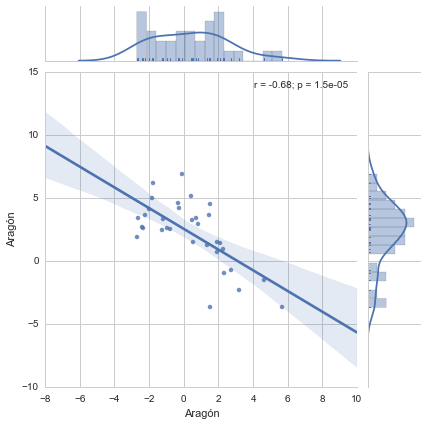

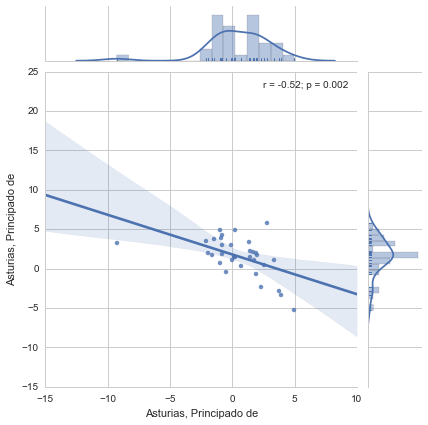

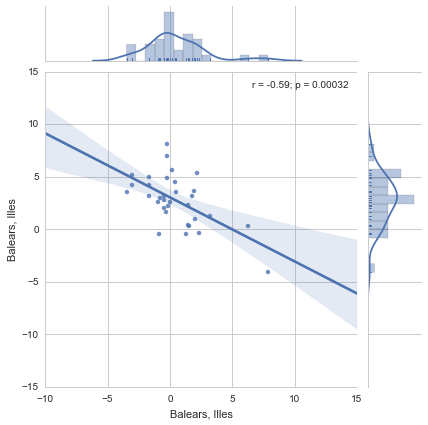

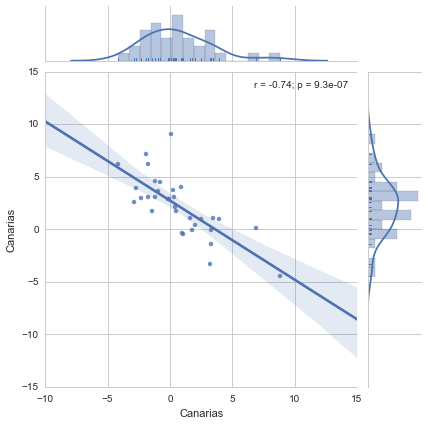

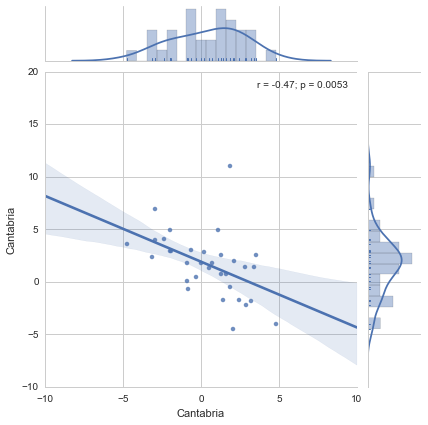

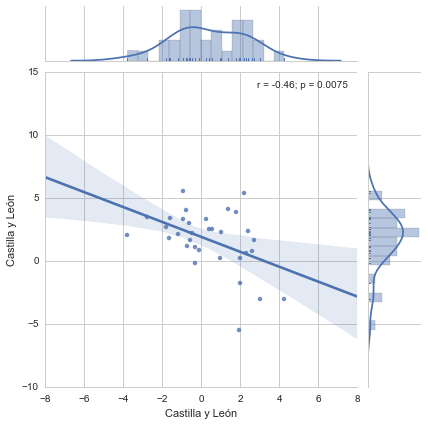

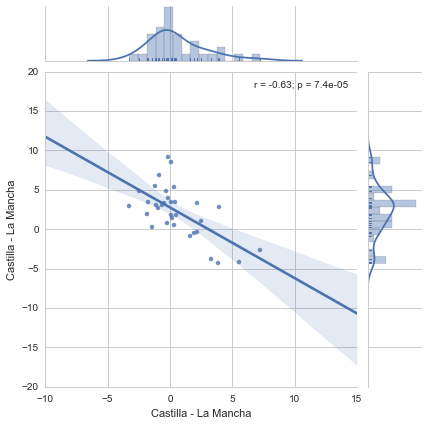

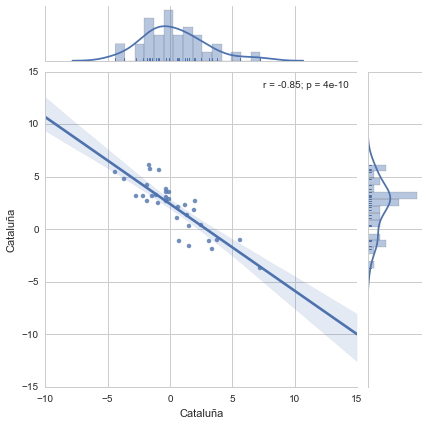

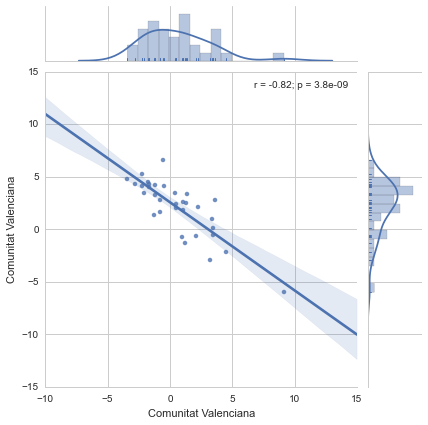

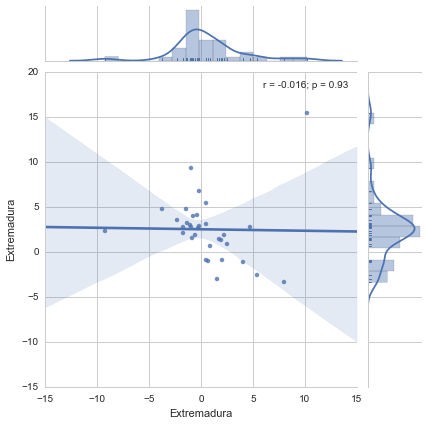

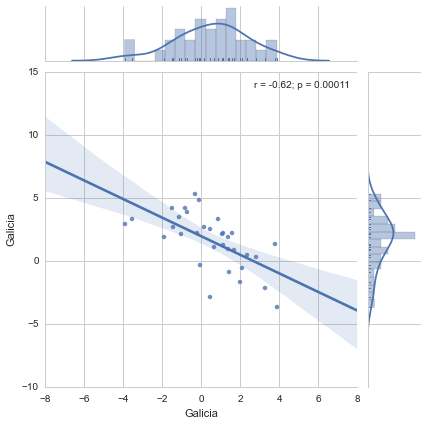

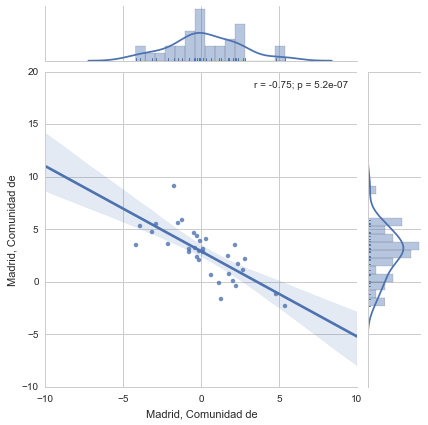

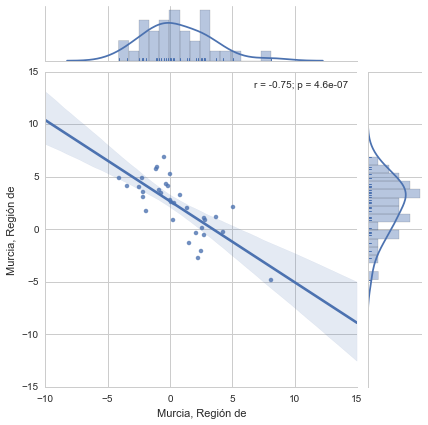

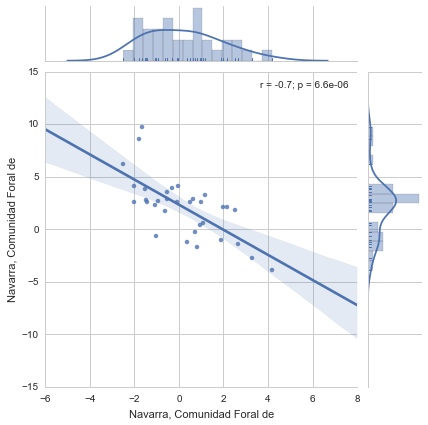

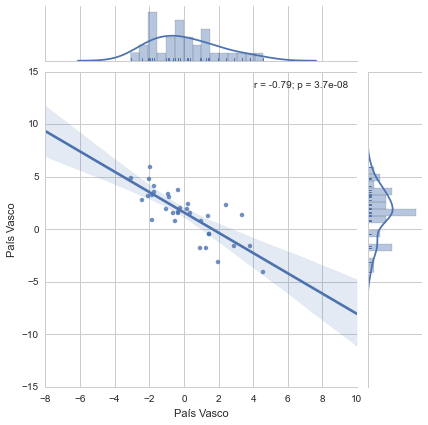

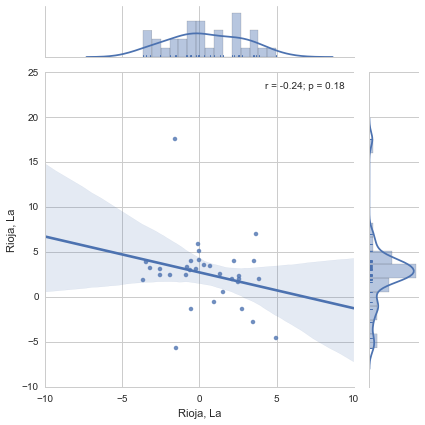

In [27]:
fig = plt.figure(figsize=(10,40))

for i, c in enumerate(ccaa):
    sns.jointplot(data.du[c], 
                  data.dy[c], 
                  annot_kws=dict(stat="r"),
                  marginal_kws=dict(bins=15, rug=True),
                  kind='reg',
                  size=6)
plt.tight_layout()

# Gráfico Regresión Lineal:

Regresión lineal: entre $d{PIB}\ y\ d{paro}$

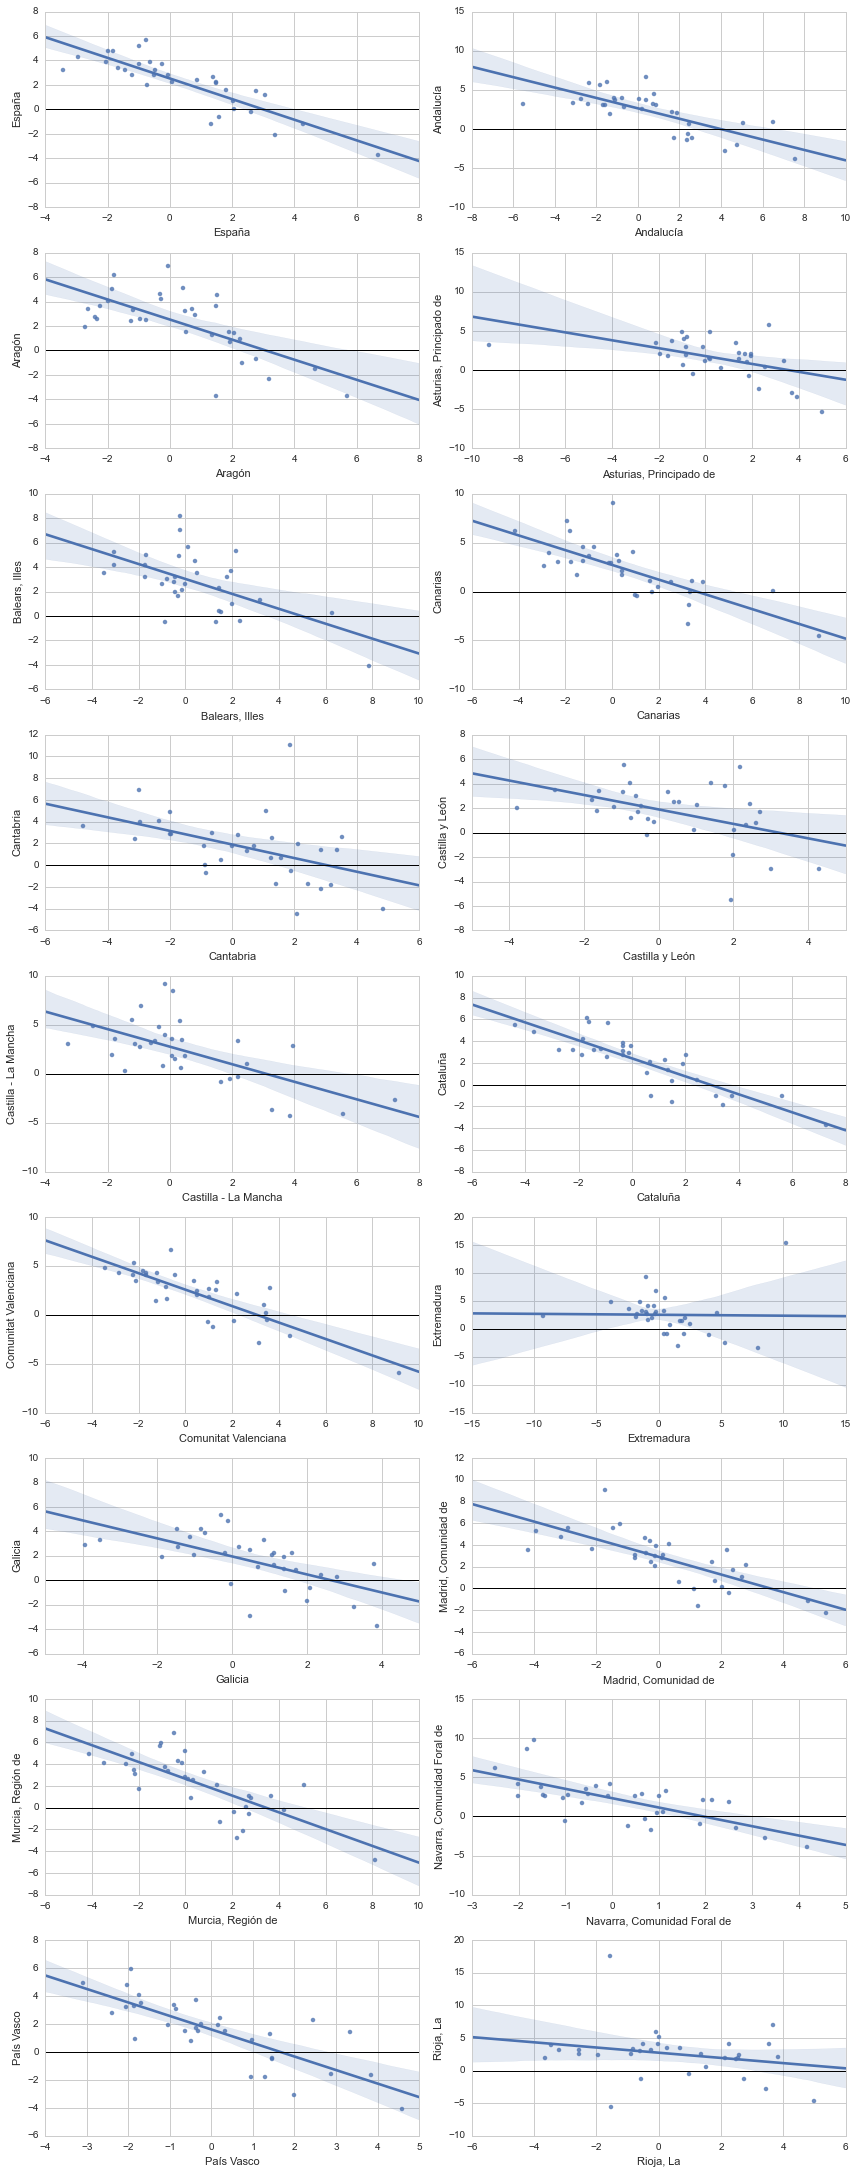

In [28]:
fig = plt.figure(figsize=(12,60))

for i, c in enumerate(ccaa):
    ax = fig.add_subplot(len(ccaa), 2, i + 1)
    sns.regplot(data.du[c], data.dy[c], ax=ax)
    plt.axhline(y=0, color='black', linewidth=1)

plt.tight_layout()

# MODELO MCO: 

In [29]:
os.chdir(dir_data_work)

In [30]:
# Modelo con extramadura de prueba.
ca = 'Extremadura'

In [31]:
# Fit and summarize OLS model
sumrz = dict()

for i, ca in enumerate(ccaa):
#    ca = ca.decode(encod)
    x = sm.add_constant(data.dy[ca])
    mod = sm.OLS(endog=data.du[ca], exog=x, hasconst=True, missing='drop')
    res = mod.fit()
    sumrz[ca] = res.summary()

## EXPORTAMOS LOS MODELOS EN UN TXT

In [35]:
for ca in ccaa:
    with open(u'MCO/modelo_%s.txt' % ca, u"wb") as f:
        print(sumrz[ca], file=f)

# Apéndice:

# Test de Jarque-Bera

En estadística, el test de Jarque-Bera es una prueba de bondad de ajuste acerca de si una muestra de datos tiene la asimetría y la curtosis de una distribución normal. El test recibe el nombre de Carlos Jarque y Anil K. Bera.

El test estadístico JB se define como:


$$JB = \frac{n-k+1}{6} \left( S^2 + \frac14 (C-3)^2 \right)$$
  
donde n es el número de observaciones (o grados de libertad en general); S es la asimetría de la muestra, C la curtosis de la muestra y k el número de regresores:


$S = \frac{ \hat{\mu}_3 }{ \hat{\sigma}^3 }$
$= \frac{\frac1n \sum_{i=1}^n (x_i-\bar{x})^3} {\left(\frac1n \sum_{i=1}^n (x_i-\bar{x})^2 \right)^{3/2}}$

$ C = \frac{ \hat{\mu}_4 }{ \hat{\sigma}^4 }$
$    = \frac{\frac1n \sum_{i=1}^n (x_i-\bar{x})^4} {\left(\frac1n \sum_{i=1}^n (x_i-\bar{x})^2 \right)^{2}} $

donde $\hat{\mu}_3$ y $\hat{\mu}_4$ son las estimaciones de los momentos centrales tercer y cuarto, respectivamente, $\bar{x}$ es la media de la muestra y $\hat{\sigma}^2$ es la estimación del segundo momento central, la varianza.

El estadístico de Jarque-Bera se distribuye asintóticamente como una distribución __chi cuadrado con dos grados de libertad__ y puede usarse para probar la __hipótesis nula__ de que los datos pertenecen a una distribución normal. La hipótesis nula es una __hipótesis conjunta__ de que la asimetría y la curtosis son nulas.



# Test de Breusch-Pagan

En estadística, el test de Breusch-Pagan se utiliza para determinar la heterocedasticidad en un modelo de regresión lineal. Analiza si la varianza estimada de los residuos de una regresión dependen de los valores de las variables independientes.

Supongamos que estimamos el siguiente modelo:


$y = \beta_0 + \beta_1 x + u$

y obtenemos un conjunto de valores para $\hat{u}$, los residuos. Con las restricciones de los Mínimos Cuadrados Ordinarios la media es 0, de modo que dada la suposición de que la varianza no depende de las variables independientes, la estimación de la varianza se puede obtener a partir de la media de los valores al cuadrado. Si la suposición no fuera correcta, podría ocurrir que la varianza estuviera relacionada linealmente con las variables independientes. Ese modelo se puede examinar haciendo una regresión de los residuos al cuadrado respecto de las variables independientes, empleando una ecuación de la forma:


$\hat{u}^2 = \gamma_0 + \gamma_1 x + v$

Esta es la base del test. Si el test-F confirma que las variables independientes son significativas, entonces se puede rechazar la __hipótesis nula__ de homocedasticidad.

# Estadístico de Durbin-Watson

En estadística, el estadístico de Durbin-Watson, desarrollado por el reputado economista Watson, es una estadística de prueba que se utiliza para detectar la presencia de autocorrelación (una relación entre los valores separados el uno del otro por un intervalo de tiempo dado) en los residuos (errores de predicción) de un análisis de la regresión. Lleva el nombre de James Durbin y Geoffrey Watson. La pequeña muestra de la distribución de esta relación se deriva de John von Neumann (von Neumann, 1941). Durbin y Watson (1950, 1951) aplicaron esta estadística para los residuales de mínimos cuadrados, y desarrollaron pruebas para la hipótesis nula de que los errores están correlacionados en serie frente a la alternativa de que siguen un proceso de primer orden autorregresivo. Más tarde, John Denis Sargan y Alok Bhargava desarrollaron varias pruebas estadísticas del tipo Neumann-Durbin-Watson von para la hipótesis nula de que los errores en un modelo de regresión siguen un proceso con una raíz unitaria contra la hipótesis alternativa de que los errores siguen un proceso estacionario de primer orden autorregresivo (Sargan y Bhargava, 1983).

## Cálculo e interpretación del estadístico de Durbin-Watson

Si et es el residual asociado a la observación en el tiempo t, entonces la prueba estadística es:

$d = {\sum_{t=2}^T (e_t - e_{t-1})^2 \over {\sum_{t=1}^T e_t^2}}$

Donde T es el número de observaciones. Puesto que d es aproximadamente igual a 2(1 − r), donde r es la autocorrelación de la muestra de los residuos,1 d = 2 indica que no hay autocorrelación. El valor de d siempre está entre -1 y 1,5. Si la estadística de Durbin-Watson es sustancialmente menor que 0,5, hay evidencia de correlación serial positiva. Como regla general, si Durbin-Watson es inferior a 1,0 aunque lo óptimos es que sea menor que 0, puede ser causa de alarma. Los valores pequeños de d indican los términos de error sucesivos son, en promedio, cerca del valor de los otros, o correlacionados positivamente. Si d> 2, los términos de error sucesivas son, en promedio, muy diferente en valor el uno del otro, es decir, correlacionada negativamente. En las regresiones, esto puede implicar una subestimación del nivel de significación estadística.

Para probar la __autocorrelación positiva__ en importancia α, la estadística de prueba d se compara con los valores críticos inferiores y superiores (dL,α and dU,α):

- Si d < dL,α, existe evidencia estadística de que los términos de error se autocorrelacionados positivamente.
- Si d > dU,α, no hay evidencia estadística de que los términos de error se autocorrelacionados positivamente.
- Si dL,α < d < dU,α, la prueba no es concluyente.

Correlación serial positiva es la correlación en serie en la que un error positivo para una observación aumenta las posibilidades de un error positivo para otra observación.

Para probar la autocorrelación negativa en significación α, la estadística de prueba (4 - d) se compara a bajar y los valores críticos de nivel superior (dL,α and dU,α):

- Si (4 − d) < dL,α, existe evidencia estadística de que los términos de error se autocorrelacionados negativamente.
- Si (4 − d) > dU,α, no hay evidencia estadística de que los términos de error se autocorrelacionados negativamente.
- Si dL,α < (4 − d) < dU,α, la prueba no es concluyente.

Correlación serial negativa implica que un error positivo para una observación aumenta la probabilidad de un error negativo para otra observación y un error negativo para uno aumenta las posibilidades de un error positivo para otra observación.

Los valores críticos, dL,α y dU,α, variar según el nivel de significación (α), el número de observaciones, y el número de predictores en la ecuación de regresión. Su derivación es compleja-los estadísticos suelen obtener a partir de los apéndices de textos estadísticos.